In [247]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from itertools import cycle
from itertools import chain

In [248]:
dark_star = {1:[25,35,45], 2:[25,30,35]}
attack_damage = {1:[50,70,162], 2: [70,90,182]}
bf_ad = 15
spell_power = {1:[3,3.25,3.5], 2:[2,2.25,2.5]}
crit_rate = 0.25
crit_multiplier = 2
ie_multiplier = 1.5 # This has to be adjusted later, IE  actually is just additive
rab_spell_multiplier = 0.5
rab_spell_power = 0.4
rod_spell_power = 0.2
ds_ad_buff = {1:[25, 35, 45], 2:[25,30,35]}
ds_ap_buff = {1:[25, 35, 45], 2:[25,30,35]}
attack_speed = 0.8
celestial_2_healing = 0.15


pre_ad = attack_damage[1][1]
post_ad = attack_damage[2][1]

pre_spell = spell_power[1][1]
post_spell = spell_power[2][1]

pre_ad_ds = ds_ad_buff[1][1]
post_ad_ds = ds_ad_buff[2][1]

pre_ap_ds = ds_ap_buff[1][1]
post_ap_ds = ds_ap_buff[2][1]

In [249]:
def crit_auto_calculation(ad, *ad_multipliers):
    """Function takes in Shaco's ad as an input, with multipliers for things like IE damage"""
    total = ad * crit_multiplier
    for ad_multiplier in ad_multipliers:
        total *= ad_multiplier
    return total

In [250]:
# Autoattack calculations only

# For a 2 star Shaco pre 10.8 hotfix

pre_normal_no_items = pre_ad
pre_crit_no_items = crit_auto_calculation(pre_ad)

pre_normal_ie = pre_ad + bf_ad
pre_crit_ie = crit_auto_calculation((pre_ad + bf_ad), ie_multiplier)

pre_normal_rabadons = pre_ad
pre_crit_rabadons = crit_auto_calculation(pre_ad)

pre_normal_gunblade = pre_ad + bf_ad
pre_crit_gunblade = crit_auto_calculation(pre_ad + bf_ad)

pre = [pre_normal_no_items, pre_crit_no_items, pre_normal_ie, pre_crit_ie, pre_normal_gunblade, pre_crit_gunblade]

# For a 2 star Shaco post 10.8 hotfix

post_normal_no_items = post_ad
post_crit_no_items = crit_auto_calculation(post_ad)

post_normal_ie = post_ad + bf_ad
post_crit_ie = crit_auto_calculation((post_ad + bf_ad), ie_multiplier)

post_normal_rabadons = pre_ad
post_crit_rabadons = crit_auto_calculation(post_ad)

post_normal_gunblade = post_ad + bf_ad
post_crit_gunblade = crit_auto_calculation(post_ad + bf_ad)


post = [post_normal_no_items, post_crit_no_items, post_normal_ie, post_crit_ie, post_normal_gunblade, post_crit_gunblade]

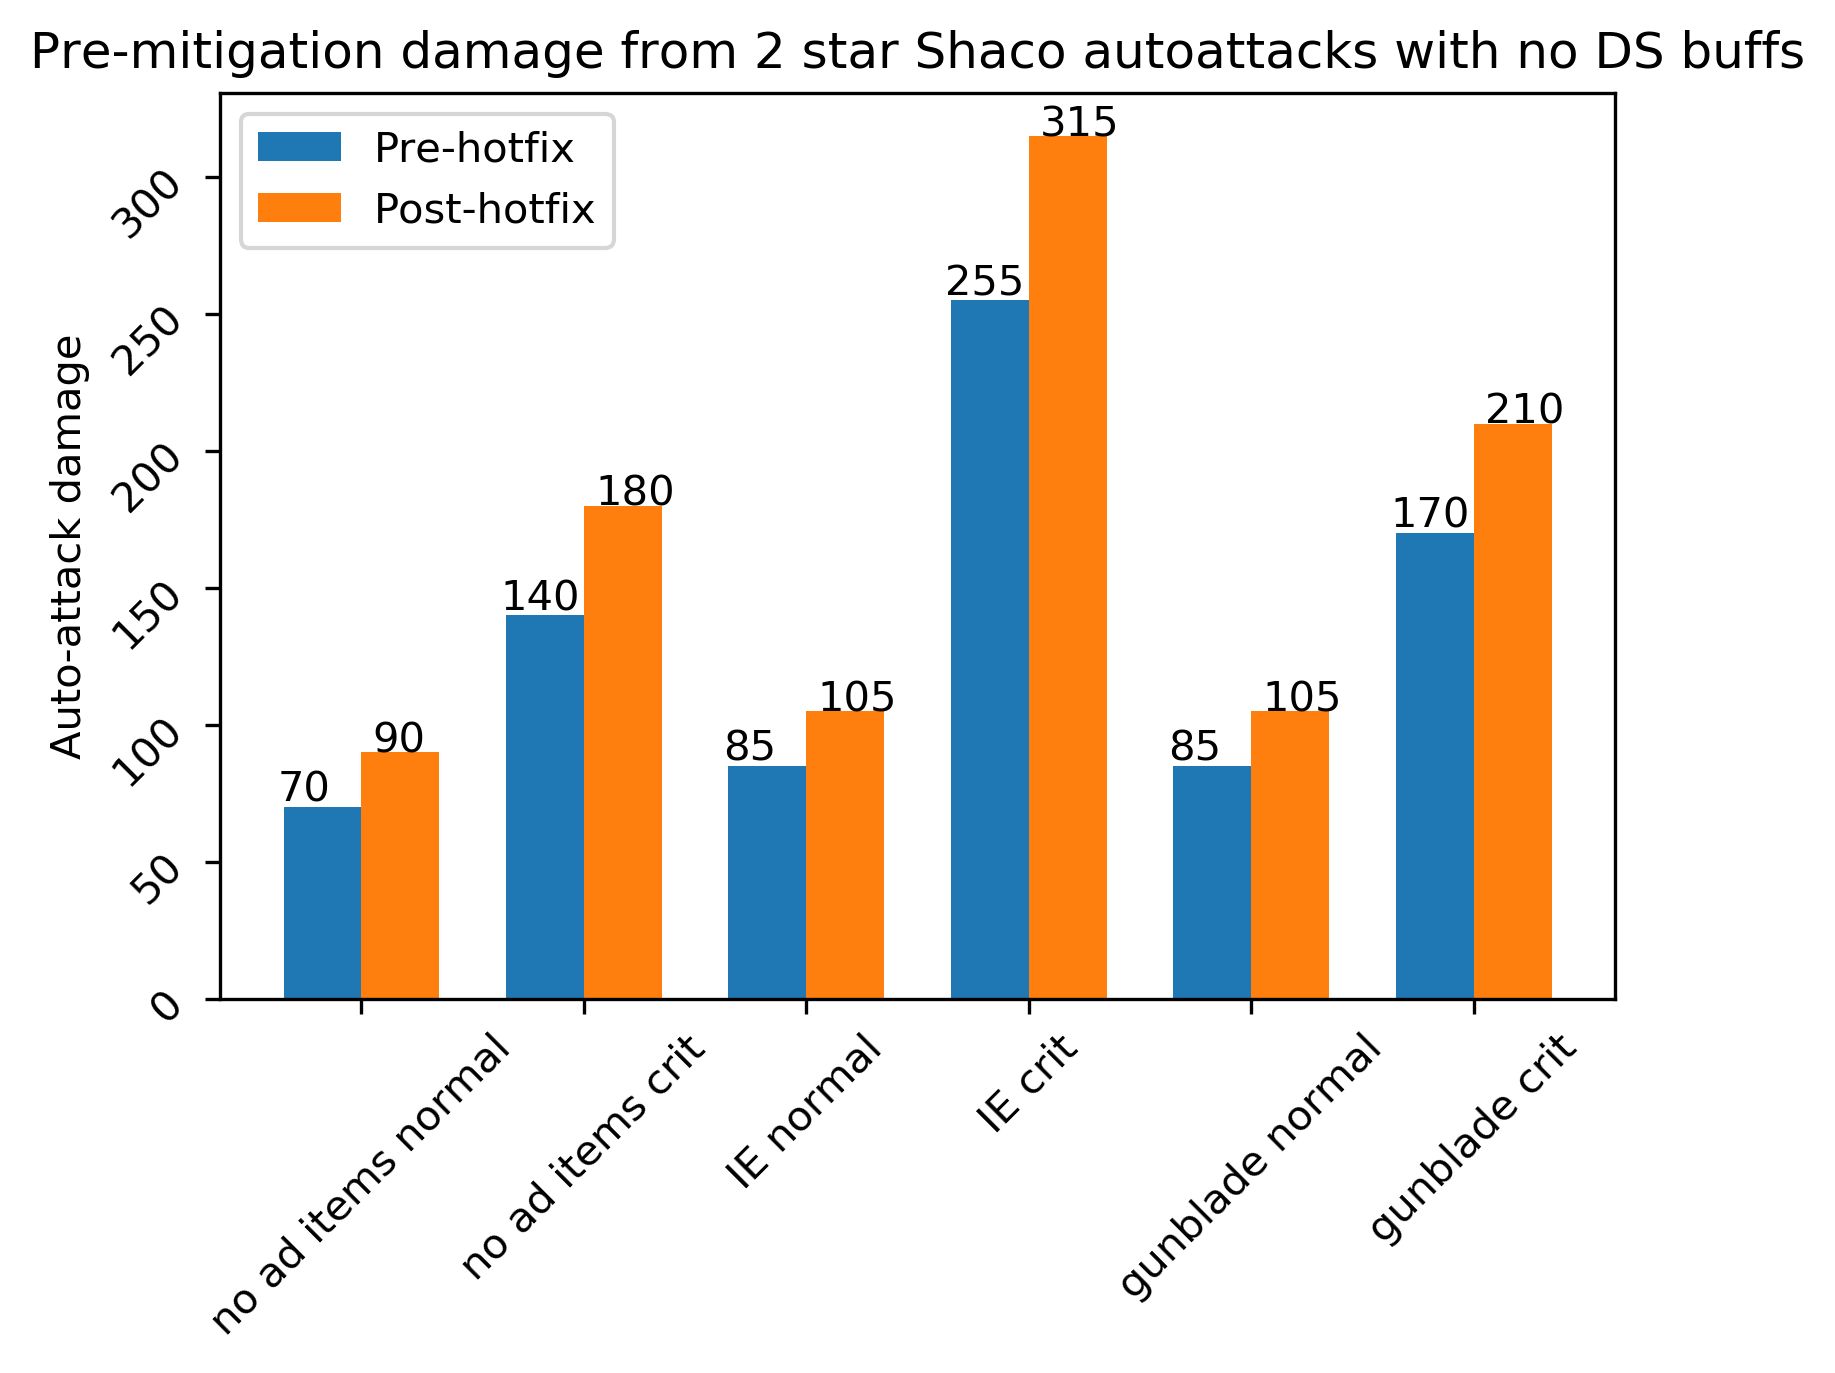

In [302]:
N = 6

fig, ax = plt.subplots(dpi = 300)

ind = np.arange(N)
width = 0.35

p1 = ax.bar(ind, pre, width)

p2 = ax.bar(ind + width, post, width)

ax.set_title('Pre-mitigation damage from 2 star Shaco autoattacks with no DS buffs')
ax.set_xticks(ind + width / 2)
ax.tick_params(labelrotation=45)
ax.set_xticklabels(("no ad items normal", "no ad items crit", "IE normal", "IE crit", "gunblade normal", "gunblade crit"))
ax.set_ylabel("Auto-attack damage")
ax.legend(["Pre-hotfix", "Post-hotfix"], loc = "upper left")

for i, v in enumerate(pre):
    plt.text(ind[i] - 0.2, v + 2, int(v))
    
for i, v in enumerate(post):
    plt.text((ind+width)[i] - 0.125, v, int(v))
    
fig.savefig("pre-mitigation autos.jpg", bbox_inches = "tight")

In [252]:
def ult_damage_calculation(ad, ap, *modifiers):
    total = ad * ap * crit_multiplier
    for modifier in modifiers:
        total *= modifier
    return total

In [281]:
# Autoattack calculations for range of DS buffs

pre_ad_ds_buffs = [buff_count * pre_ad_ds for buff_count in range(9)]
post_ad_ds_buffs = [buff_count * post_ad_ds for buff_count in range(9)]

pre_ap_ds_buffs = [buff_count * pre_ap_ds for buff_count in range(9)]
post_ap_ds_buffs = [buff_count * post_ap_ds for buff_count in range(9)]

pre_ds_damage = [ult_damage_calculation(ad, (ap * 0.01)  + 1) for ad, ap in list(zip(pre_ad_ds_buffs, pre_ap_ds_buffs))]
post_ds_damage = [ult_damage_calculation(ad, (ap * 0.01)  + 1) for ad, ap in list(zip(post_ad_ds_buffs, post_ap_ds_buffs))]

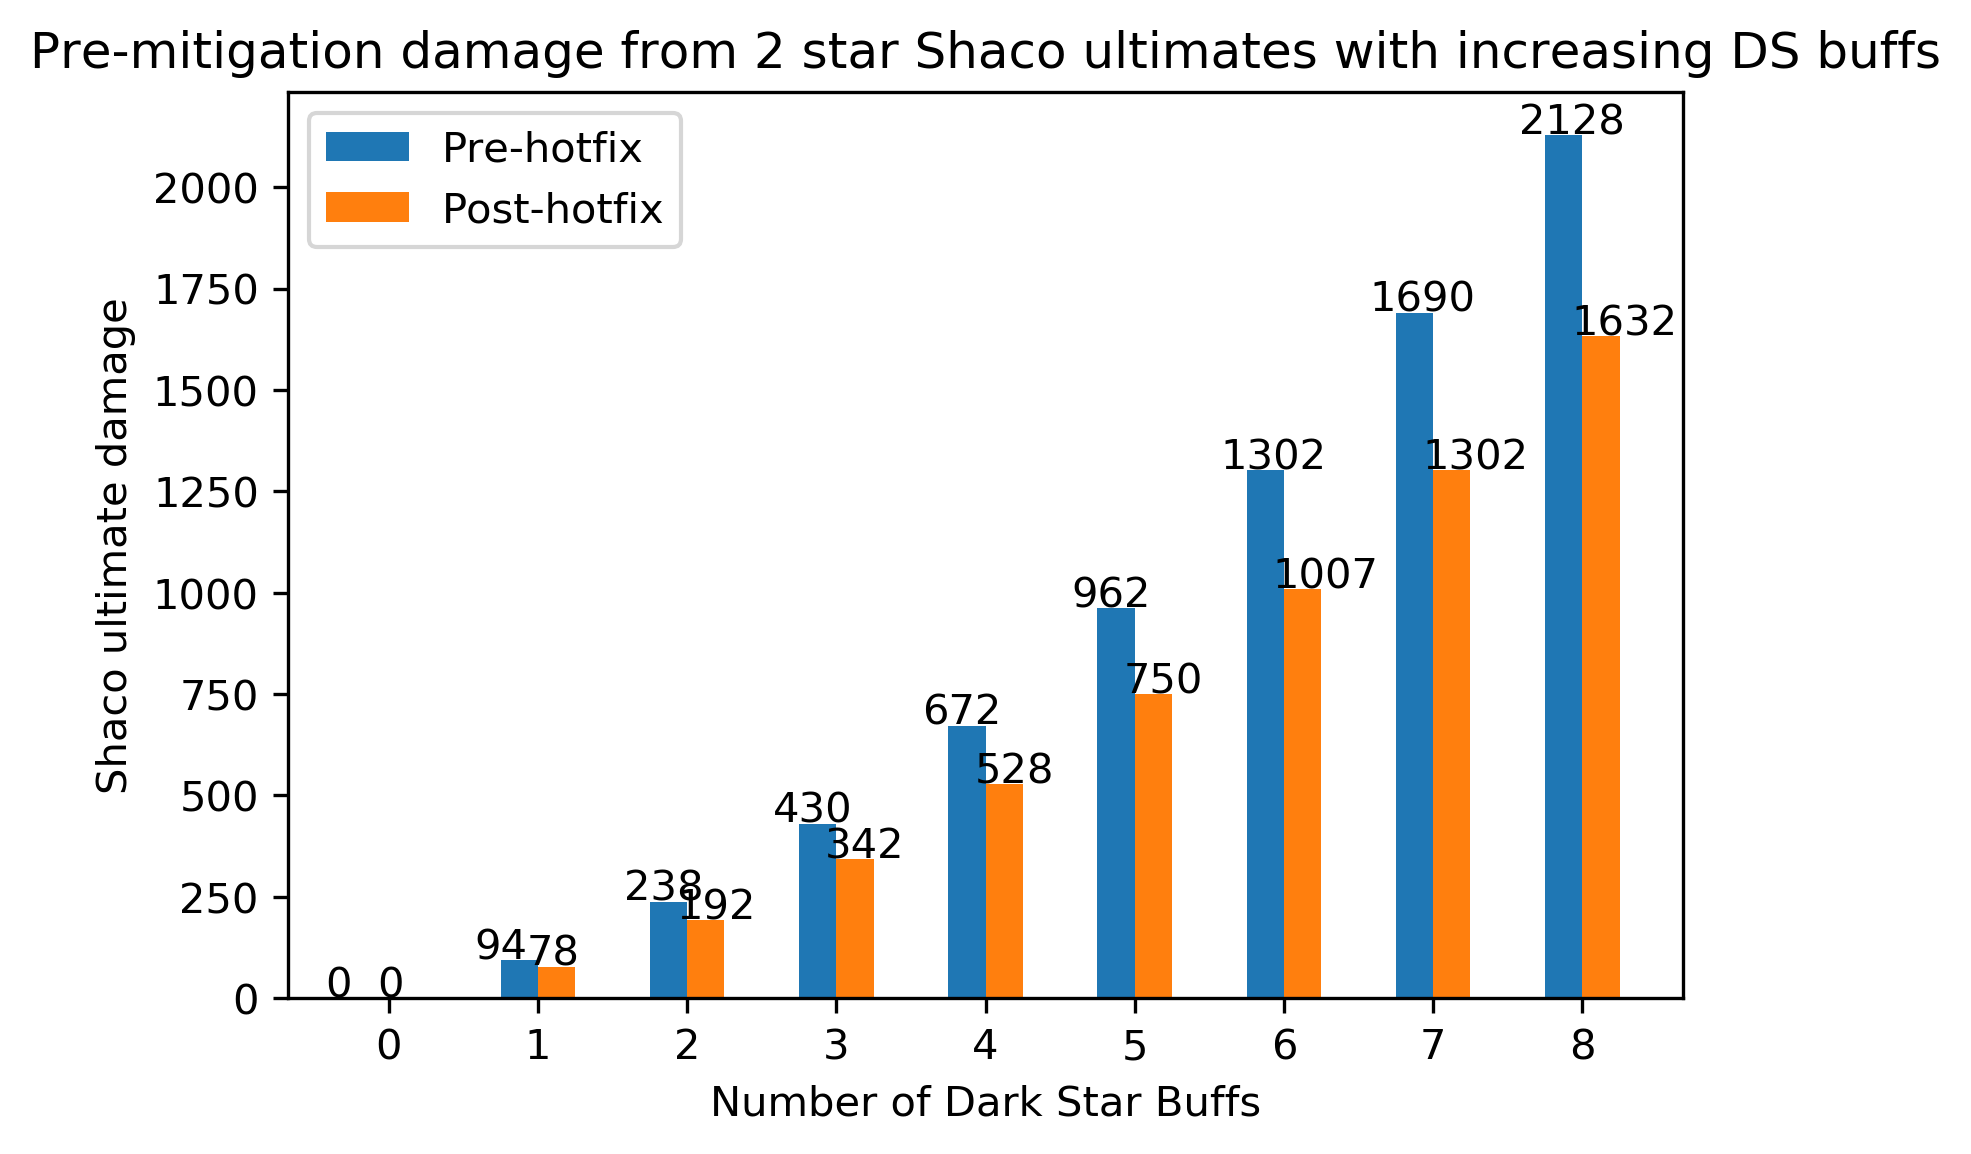

In [303]:
N = 9

fig, ax = plt.subplots(dpi = 300)

ind = np.arange(N)
width = 0.25

p1 = ax.bar(ind, pre_ds_damage, width)

p2 = ax.bar(ind + width, post_ds_damage, width)

ax.set_title('Pre-mitigation damage from 2 star Shaco ultimates with increasing DS buffs')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(range(9))
ax.set_ylabel("Shaco ultimate damage")
ax.legend(["Pre-hotfix", "Post-hotfix"], loc = "upper left")
ax.set_xlabel("Number of Dark Star Buffs")

for i, v in enumerate(pre_ds_damage):
    plt.text(ind[i] - 0.3, v + 4, int(v))
    
for i, v in enumerate(post_ds_damage):
    plt.text((ind+width)[i] - 0.2, v + 4, int(v))
    
fig.savefig("DS_buffs.jpg", bbox_inches = "tight")

In [253]:
# Ult calculations only

# For a 2 star Shaco pre 10.8 hotfix

pre_ult_no_items = ult_damage_calculation(pre_ad, pre_spell)
pre_ult_ie = ult_damage_calculation((pre_ad + bf_ad), pre_spell, ie_multiplier)
pre_ult_rabadons = ult_damage_calculation(pre_ad, (pre_spell + rab_spell_power + rab_spell_power * rab_spell_multiplier))
pre_ult_gunblade = ult_damage_calculation((pre_ad + bf_ad), (pre_spell + rod_spell_power))

pre_ult = [pre_ult_no_items, pre_ult_ie,  pre_ult_gunblade, pre_ult_rabadons]

# For a 2 star Shaco post 10.8 hotfix

post_ult_no_items = ult_damage_calculation(post_ad, post_spell)
post_ult_ie = ult_damage_calculation((post_ad + bf_ad), post_spell, ie_multiplier)
post_ult_rabadons = ult_damage_calculation(post_ad, (post_spell + rab_spell_power + rab_spell_power * rab_spell_multiplier))
post_ult_gunblade = ult_damage_calculation((post_ad + bf_ad), (post_spell + rod_spell_power))

post_ult = [post_ult_no_items, post_ult_ie, post_ult_gunblade, post_ult_rabadons]

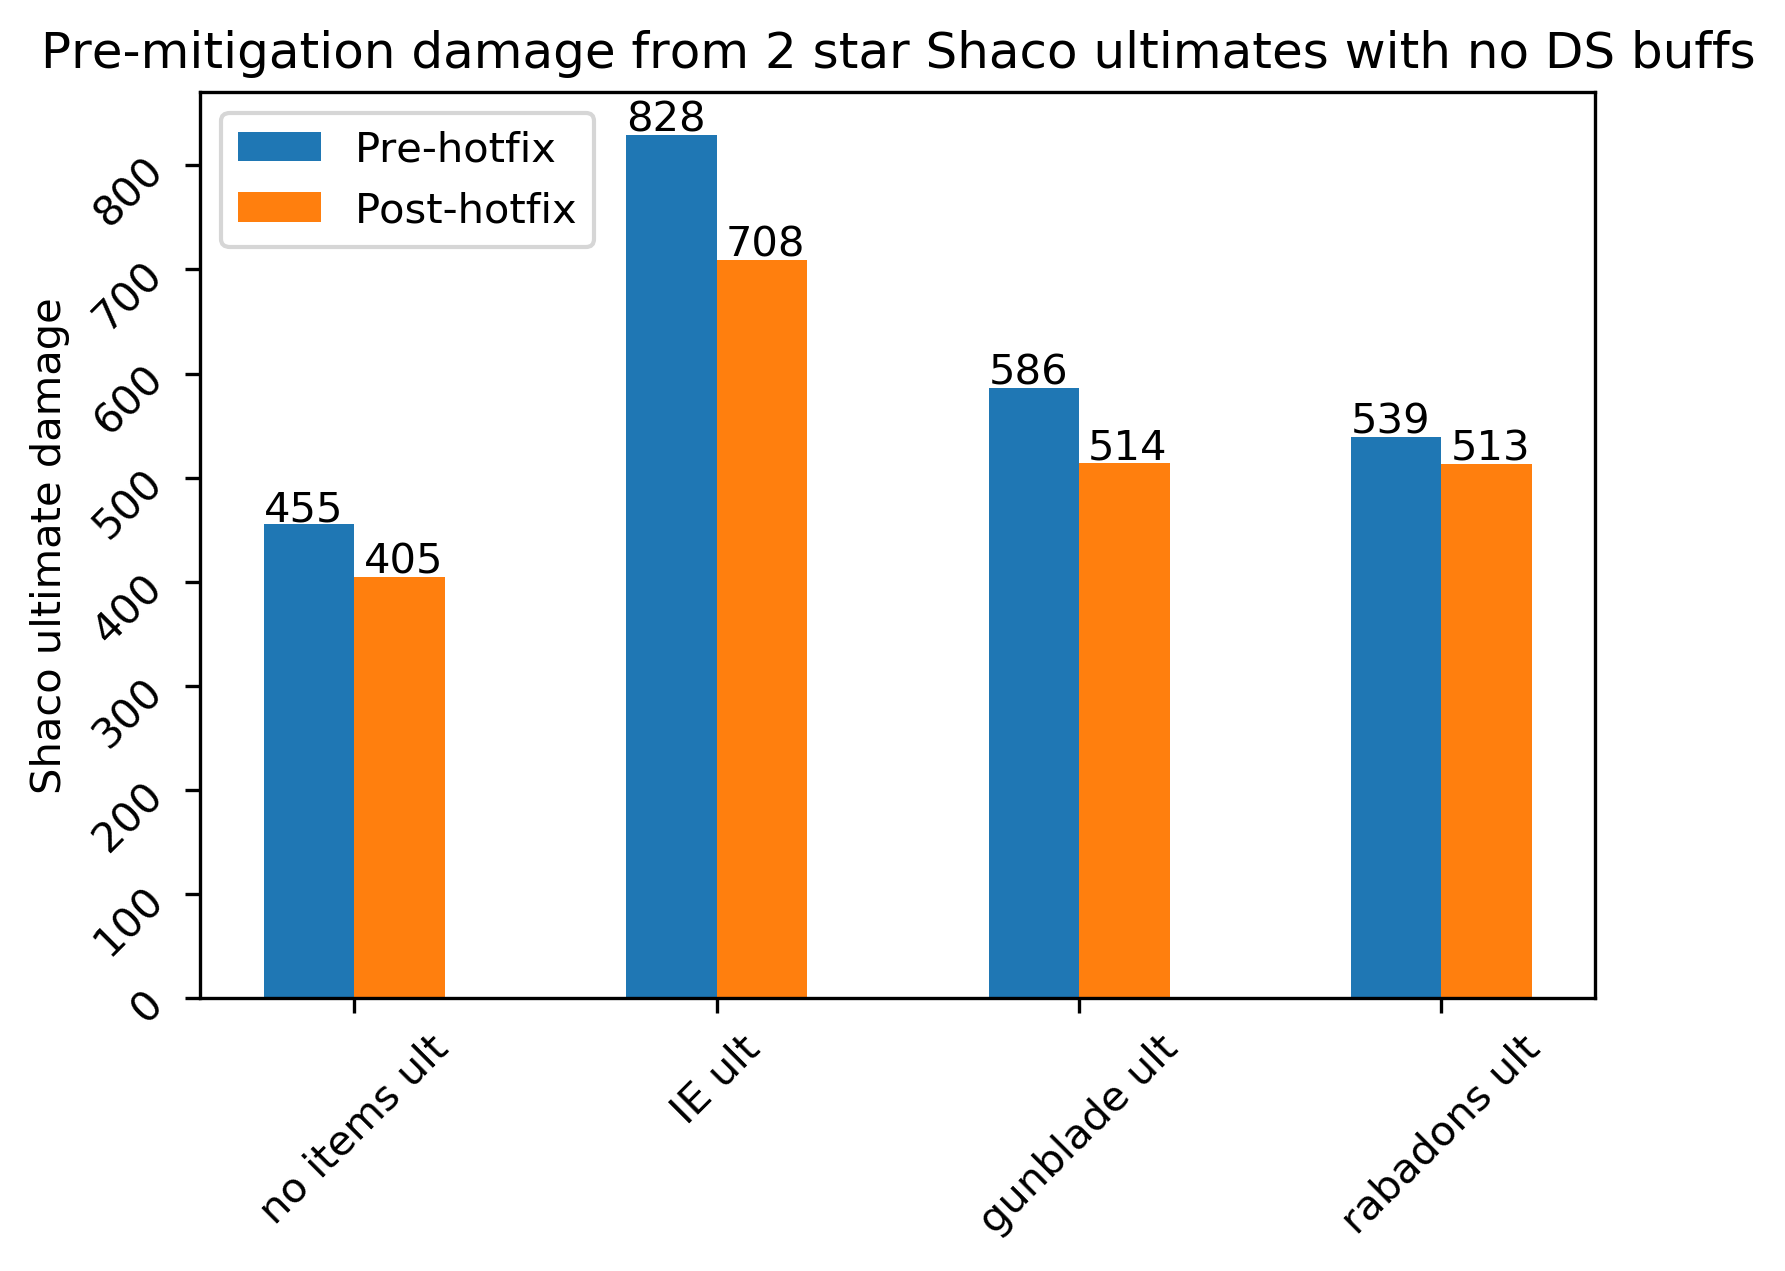

In [304]:
N = 4

fig, ax = plt.subplots(dpi = 300)

ind = np.arange(N)
width = 0.25

p1 = ax.bar(ind, pre_ult, width)

p2 = ax.bar(ind + width, post_ult, width)

ax.set_title('Pre-mitigation damage from 2 star Shaco ultimates with no DS buffs')
ax.set_xticks(ind + width / 2)
ax.tick_params(labelrotation=45)
ax.set_xticklabels(("no items ult", "IE ult", "gunblade ult", "rabadons ult"))
ax.set_ylabel("Shaco ultimate damage")
ax.legend(["Pre-hotfix", "Post-hotfix"], loc = "upper left")

for i, v in enumerate(pre_ult):
    plt.text(ind[i] - 0.125, v + 4, int(v))
    
for i, v in enumerate(post_ult):
    plt.text((ind+width)[i] - 0.1, v + 4, int(v))
    
fig.savefig("pre-mitigation ultimates.jpg", bbox_inches = "tight")

In [255]:
pre_starting_mana = 0
pre_final_mana = 60

post_starting_mana = 30
post_final_mana = 80
mana_on_hit = 10

pre_mana_value = cycle(range(pre_starting_mana, pre_final_mana, mana_on_hit))
post_mana_value = chain(range(post_starting_mana, post_final_mana + 1, mana_on_hit), cycle(range(0,post_final_mana + 1,mana_on_hit)))

round_length = 30 #time in seconds
maximum_attacks_in_round = int(round_length * attack_speed) + 1

pre_mana_values = [next(pre_mana_value) for attack in range(maximum_attacks_in_round)]
post_mana_values = [next(post_mana_value) for attack in range(maximum_attacks_in_round)]

np.linspace(0, round_length, 25)

array([ 0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ,
       11.25, 12.5 , 13.75, 15.  , 16.25, 17.5 , 18.75, 20.  , 21.25,
       22.5 , 23.75, 25.  , 26.25, 27.5 , 28.75, 30.  ])

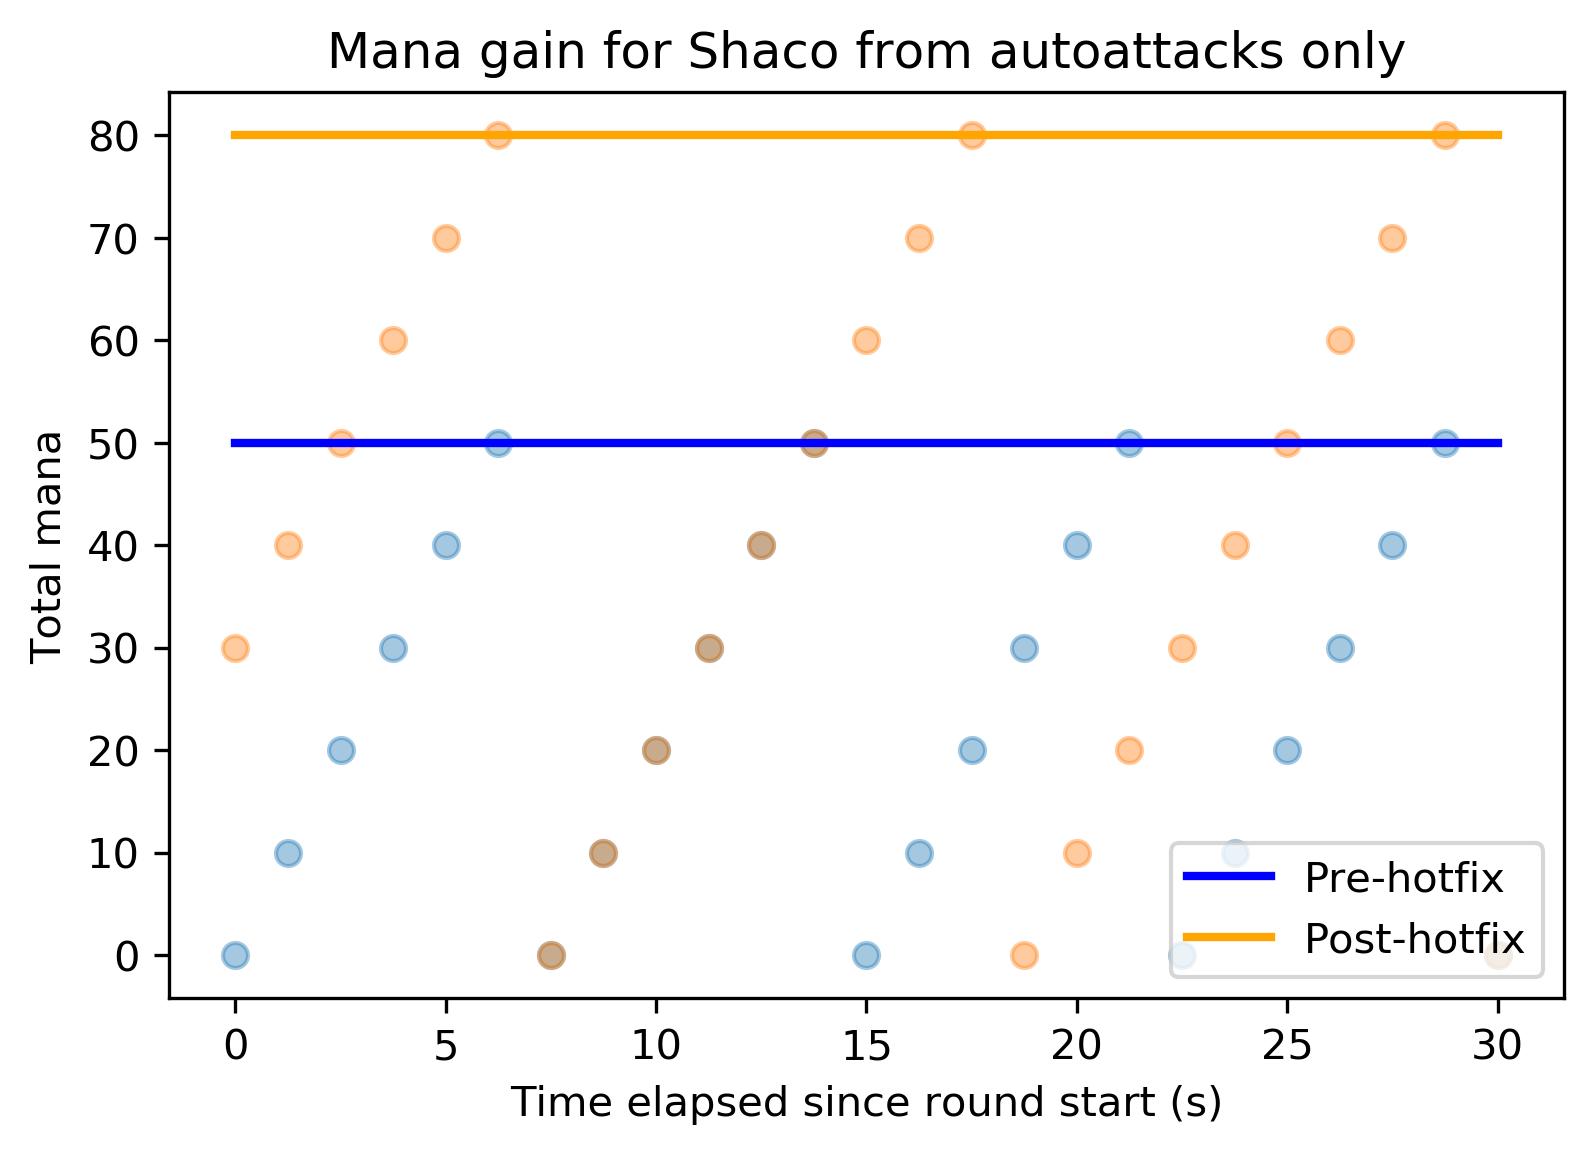

In [305]:
fig, ax = plt.subplots(dpi = 300)

pre_mana = ax.scatter(np.linspace(0, round_length, 25), pre_mana_values, alpha = 0.4)
post_mana = ax.scatter(np.linspace(0, round_length, 25), post_mana_values, alpha = 0.4)

ax.plot([0,30], [50,50], lw=2, color = "blue")
ax.plot([0,30], [80,80], lw=2, color = "orange")

ax.set_title("Mana gain for Shaco from autoattacks only")
ax.set_xlabel("Time elapsed since round start (s)")
ax.set_ylabel("Total mana")
ax.legend(["Pre-hotfix", "Post-hotfix"], loc = "lower right")

fig.savefig("mana gain.jpg", bbox_inches = "tight")

In [257]:
ds_buffs = np.arange(9)

pre_ds_ad_buffs = ds_buffs * pre_ad_ds
post_ds_ad_buffs = ds_buffs * post_ad_ds

pre_ds_ap_buffs = ds_buffs * pre_ap_ds
post_ds_ap_buffs = ds_buffs * post_ap_ds

pre_autos_in_30s = 20
pre_ults_in_30s = 4

post_autos_in_30s = 21
post_ults_in_30s = 3

no_items_ds_buffs = []

ie_ds_buffs = []

rabadons_ds_buffs = []

In [258]:
def average_dps_calculation(auto_damage, crit_damage, ult_damage, crit_chance, number_of_autos, number_of_ults):
    auto_damage_30s = number_of_autos * (((1-crit_chance) * auto_damage) + (crit_chance * crit_damage))
    ult_damage_30s = number_of_ults * ult_damage
    return (auto_damage_30s + ult_damage_30s) / 30

pre_ie_dps = average_dps_calculation(pre_normal_ie, pre_crit_ie, pre_ult_ie, crit_rate, pre_autos_in_30s, pre_ults_in_30s)
post_ie_dps = average_dps_calculation(post_normal_ie, post_crit_ie, post_ult_ie, crit_rate, post_autos_in_30s, post_ults_in_30s)

pre_no_items_dps = average_dps_calculation(pre_normal_no_items, pre_crit_no_items, pre_ult_no_items, crit_rate, pre_autos_in_30s, pre_ults_in_30s)
post_no_items_dps = average_dps_calculation(post_normal_no_items, post_crit_no_items, post_ult_no_items, crit_rate, post_autos_in_30s, post_ults_in_30s)

pre_rabadons_dps = average_dps_calculation(pre_normal_rabadons, pre_crit_rabadons, pre_ult_rabadons, crit_rate, pre_autos_in_30s, pre_ults_in_30s)
post_rabadons_dps = average_dps_calculation(post_normal_rabadons, post_crit_rabadons, post_ult_rabadons, crit_rate, post_autos_in_30s, post_ults_in_30s)

pre_gunblade_dps = average_dps_calculation(pre_normal_gunblade, pre_crit_gunblade, pre_ult_gunblade, crit_rate, pre_autos_in_30s, pre_ults_in_30s)
post_gunblade_dps = average_dps_calculation(post_normal_gunblade, post_crit_gunblade, post_ult_gunblade, crit_rate, post_autos_in_30s, post_ults_in_30s)

pre_dps = [pre_no_items_dps, pre_ie_dps, pre_gunblade_dps, pre_rabadons_dps]
post_dps = [post_no_items_dps, post_ie_dps, post_gunblade_dps, post_rabadons_dps]

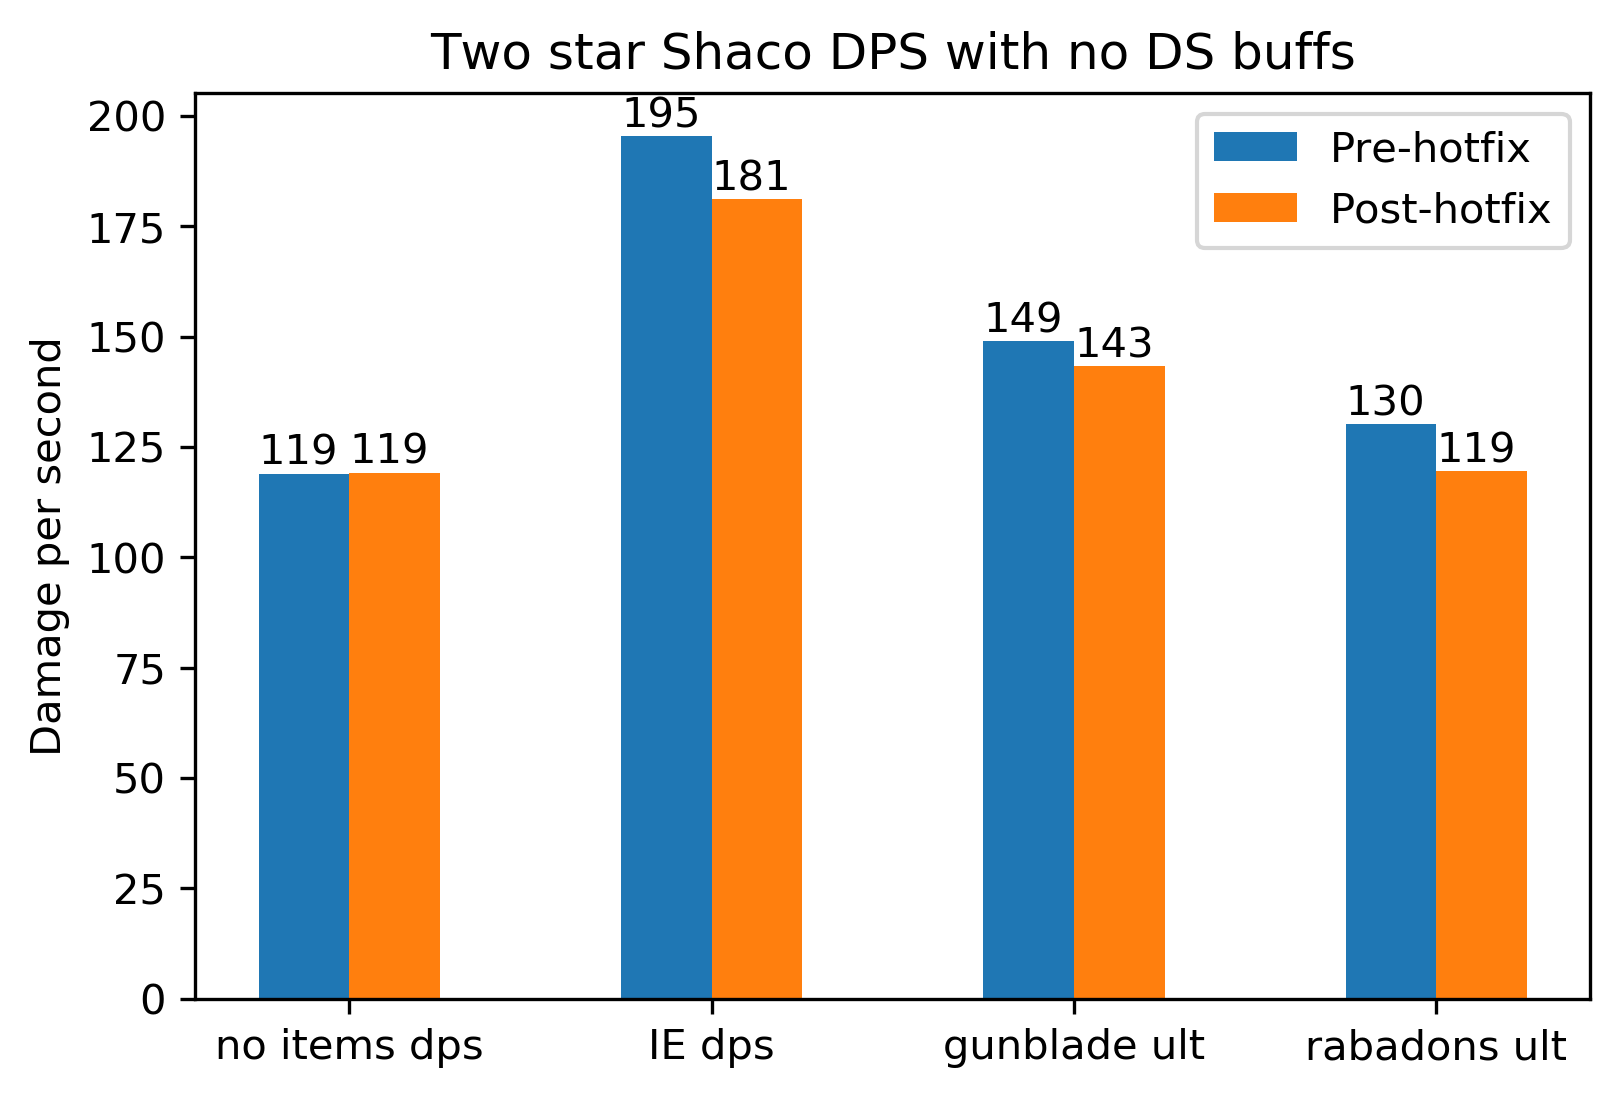

In [306]:
N = 4

fig, ax = plt.subplots(dpi = 300)

ind = np.arange(N)
width = 0.25

p1 = ax.bar(ind, pre_dps, width)

p2 = ax.bar(ind + width, post_dps, width)

ax.set_title('Two star Shaco DPS with no DS buffs')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(("no items dps", "IE dps", "gunblade ult", "rabadons ult"))
ax.set_ylabel("Damage per second")
ax.legend(["Pre-hotfix", "Post-hotfix"], loc = "upper right")


for i, v in enumerate(pre_dps):
    plt.text(ind[i] - 0.125, v + 2, int(v))
    
for i, v in enumerate(post_dps):
    plt.text((ind+width)[i] - 0.125, v + 2, int(v))
    
fig.savefig("dps.jpg", bbox_inches = "tight")

In [260]:
# Calculations for total damage and healing

pre_total_damage = [dps * 30 for dps in pre_dps]
post_total_damage = [dps * 30 for dps in post_dps]

pre_healing_2_celestial = [total_damage * celestial_2_healing for total_damage in pre_total_damage]
post_healing_2_celestial = [total_damage * celestial_2_healing for total_damage in post_total_damage]

# Gunblade heals for an extra 25%,so adding that on post-hoc to the list
pre_healing_2_celestial[2] = pre_healing_2_celestial[2] + pre_total_damage[2] * 0.25 
post_healing_2_celestial[2] = post_healing_2_celestial[2] + post_total_damage[2] * 0.25 

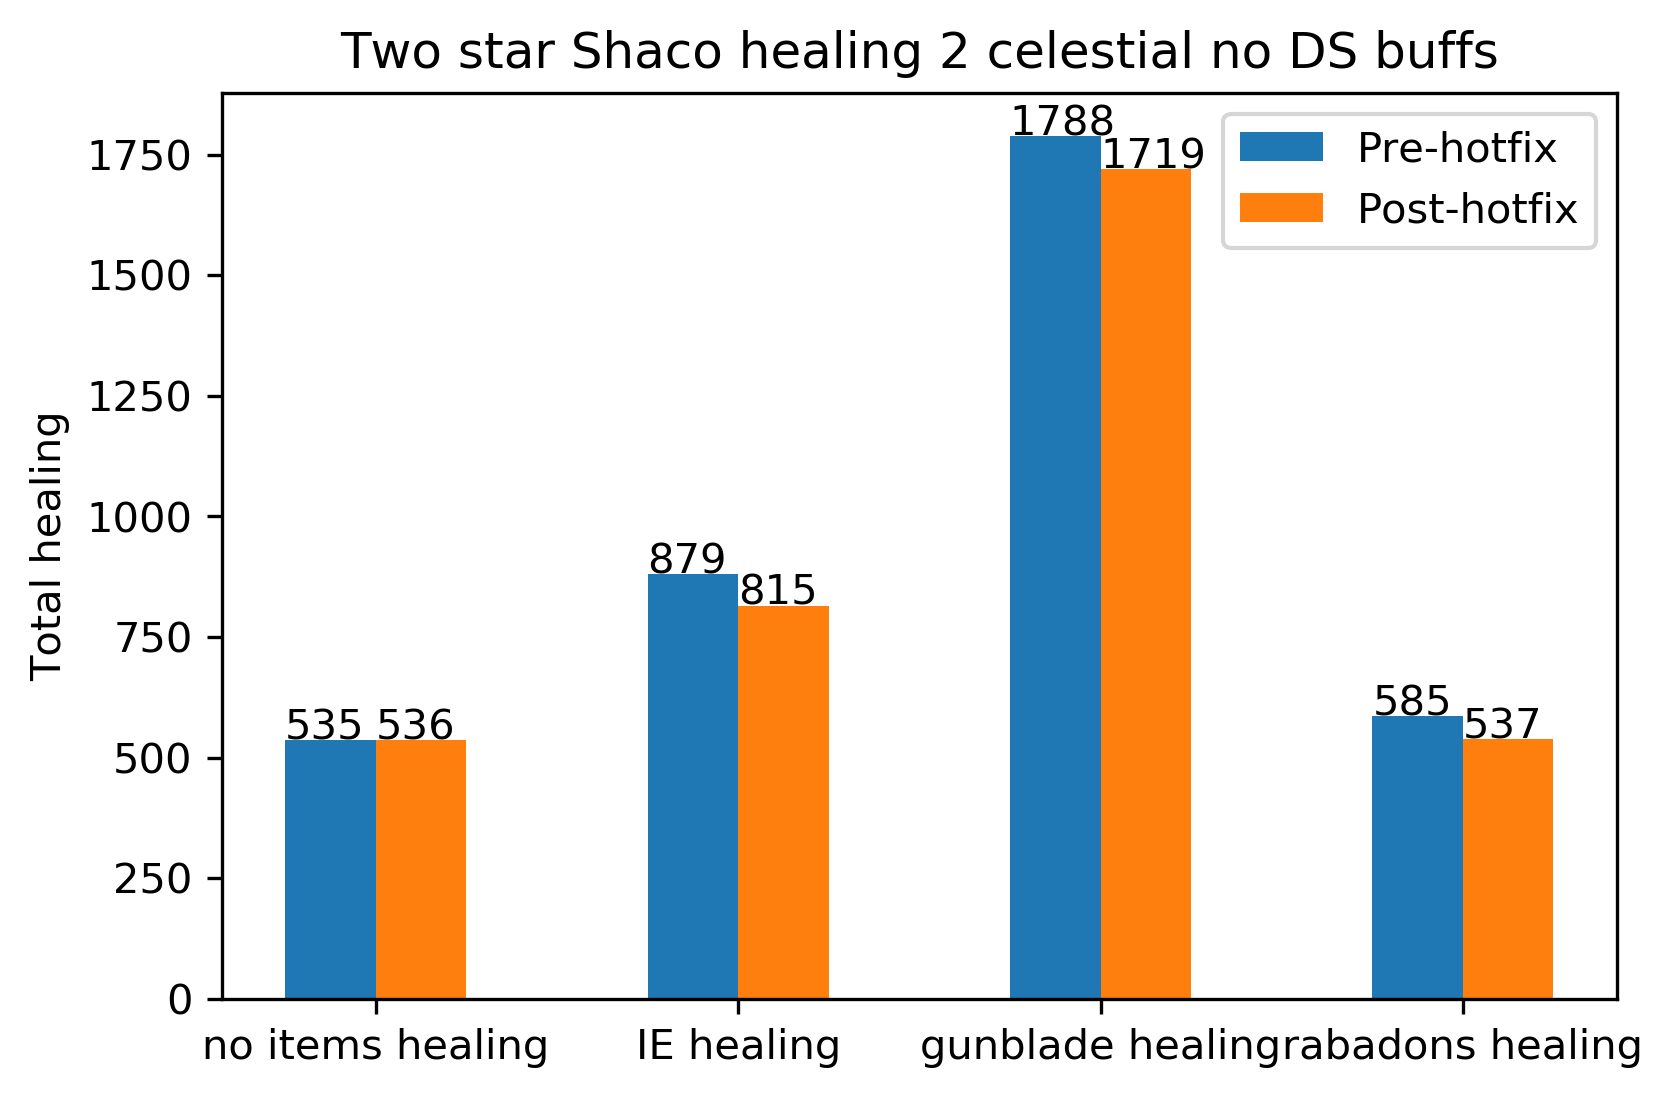

In [307]:
N = 4

fig, ax = plt.subplots(dpi = 300)

ind = np.arange(N)
width = 0.25

p1 = ax.bar(ind, pre_healing_2_celestial, width)

p2 = ax.bar(ind + width, post_healing_2_celestial, width)

ax.set_title('Two star Shaco healing 2 celestial no DS buffs')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(("no items healing", "IE healing", "gunblade healing", "rabadons healing"))
ax.set_ylabel("Total healing")
ax.legend(["Pre-hotfix", "Post-hotfix"], loc = "upper right")


for i, v in enumerate(pre_healing_2_celestial):
    plt.text(ind[i] - 0.125, v + 2, int(v))
    
for i, v in enumerate(post_healing_2_celestial):
    plt.text((ind+width)[i] - 0.125, v + 2, int(v))
    
fig.savefig("healing.jpg", bbox_inches = "tight")